In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
results = pd.read_csv('MOB_final_results.csv', index_col=0)
sample_info = pd.read_csv('MOB_sample_info.csv', index_col=0)

In [4]:
df = pd.read_csv('data/Rep11_MOB_0.csv', index_col=0)
df = df.T[df.sum(0) >= 3].T  # Filter practically unobserved genes
sample_info = sample_info.query('total_counts > 10')  # Remove empty features
df = df.loc[sample_info.index]
dfm = np.log10(df + 1)

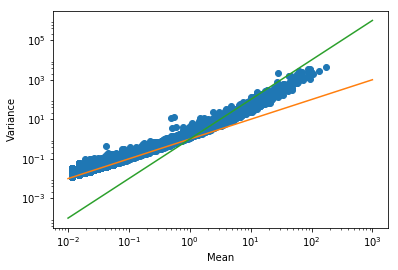

In [5]:
figsize(6, 4)
plt.loglog()
plt.scatter(df.mean(), df.var());
xy = [1e-2, 1e3]
plt.plot(xy, xy, c='C1');
plt.plot(xy, np.square(xy), c='C2');
plt.xlabel('Mean')
plt.ylabel('Variance');

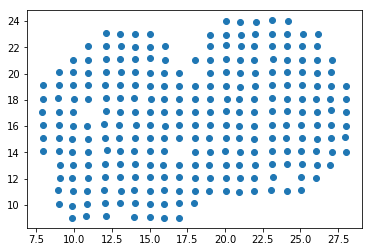

In [6]:
plt.scatter(sample_info.x, sample_info.y);

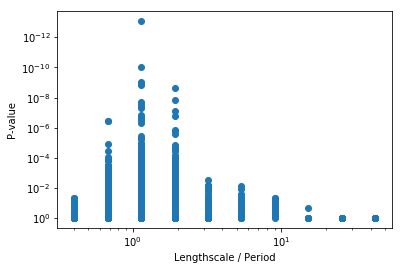

In [7]:
plt.loglog()
plt.scatter(results.l, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Lengthscale / Period')
plt.ylabel('P-value');

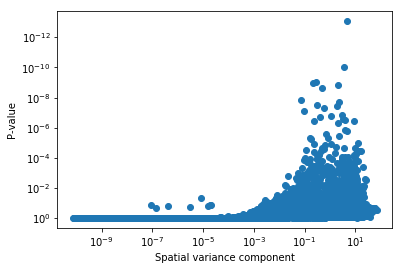

In [8]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('P-value');

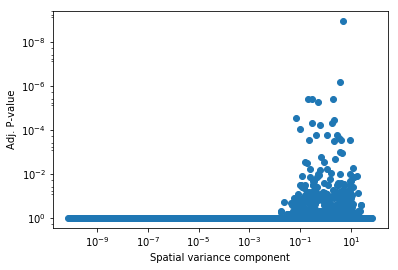

In [9]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.qval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('Adj. P-value');

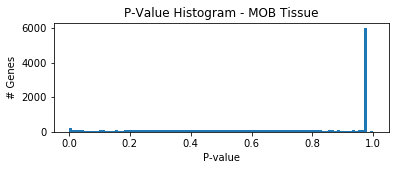

In [10]:
figsize(6, 2)
plt.hist(results.pval, bins=100);
plt.title('P-Value Histogram - MOB Tissue')
plt.ylabel('# Genes')
plt.xlabel('P-value');

plt.savefig('MOB-pvalue-hist.pdf')

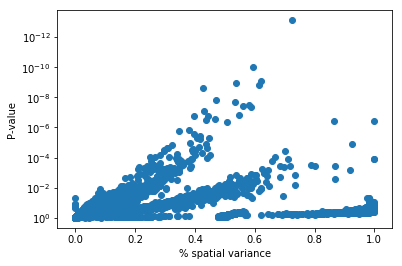

In [11]:
figsize(6, 4)
plt.yscale('log')
results['total_variance'] = results.max_delta * results.max_s2_t_hat + results.max_s2_t_hat

for i, g in results.groupby('model'):
    plt.scatter(g.max_s2_t_hat / g.total_variance, g.pval)
    

plt.gca().invert_yaxis();
plt.xlabel('% spatial variance')
plt.ylabel('P-value');

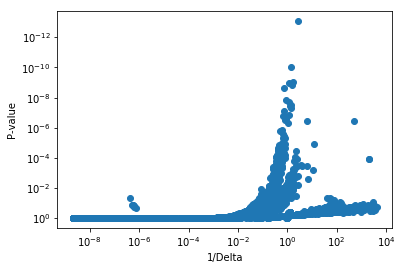

In [12]:
figsize(6, 4)
plt.yscale('log')
plt.xscale('log')

for i, g in results.groupby('model'):
    plt.scatter(1. / g.max_delta, g.pval)
    

plt.gca().invert_yaxis();
plt.xlabel('1/Delta')
plt.ylabel('P-value');

In [13]:
results.model.value_counts()

SE    14859
Name: model, dtype: int64

In [14]:
results.query('qval < 0.05').shape

(67, 16)

In [15]:
results.query('qval < 0.05').model.value_counts()

SE    67
Name: model, dtype: int64

In [16]:
N = 10
top_per_ls = results.query('qval < 0.05') \
    .sort_values('qval', ascending=True) \
    .groupby('l') \
    .head(N) \
    .sort_values(['l', 'qval'], ascending=[True, True])

top_per_ls

,g,max_delta,max_ll,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_null,LLR,pval,qval,total_variance
3302,Cdr1,0.154156,-274.859776,-4.861639,9.057264,260,0.001052,0.675535,4,SE,571.962278,-300.834325,25.974549,3.459481e-07,2.855801e-04,10.453494
4957,Taf7l,0.002016,379.639207,0.759994,0.226436,260,0.000523,0.675535,4,SE,-737.035688,353.854628,25.784579,3.817263e-07,2.985300e-04,0.226893
4955,4933405L10Rik,0.080844,469.434087,0.793755,0.236625,260,0.001064,0.675535,4,SE,-916.625447,450.283482,19.150605,1.207992e-05,5.983184e-03,0.255755
3123,Tspan7,0.423110,-9.128270,-6.006126,11.899157,260,0.000614,0.675535,4,SE,40.499266,-26.102639,16.974369,3.788785e-05,1.387103e-02,16.933815
3383,Slc17a7,0.498933,-251.722746,-2.950334,3.085306,260,0.000711,0.675535,4,SE,525.688219,-267.118231,15.395485,8.719640e-05,2.665667e-02,4.624666
4994,Olfr635,0.000486,424.784393,0.885008,0.304648,260,0.000619,0.675535,4,SE,-827.326060,409.956637,14.827756,1.177891e-04,3.182233e-02,0.304797
4993,Gna14,0.000486,424.784393,0.885008,0.304648,260,0.000734,0.675535,4,SE,-827.326060,409.956637,14.827756,1.177891e-04,3.182233e-02,0.304797
2659,Rab3b,0.407188,-200.416211,-2.933521,3.059215,260,0.000510,0.675535,4,SE,423.075148,-215.047081,14.630870,1.307551e-04,3.355423e-02,4.304891
3085,Necab2,0.517650,-152.846732,-6.161980,12.221010,260,0.000515,0.675535,4,SE,327.936191,-167.061879,14.215147,1.630528e-04,3.845716e-02,18.547220
6353,Cpe,0.379205,-25.338919,-5.626476,4.628933,260,0.000515,1.135190,4,SE,72.920564,-81.214841,55.875922,7.716050e-14,1.146528e-09,6.384250


In [17]:
top_per_ls.shape

(29, 16)

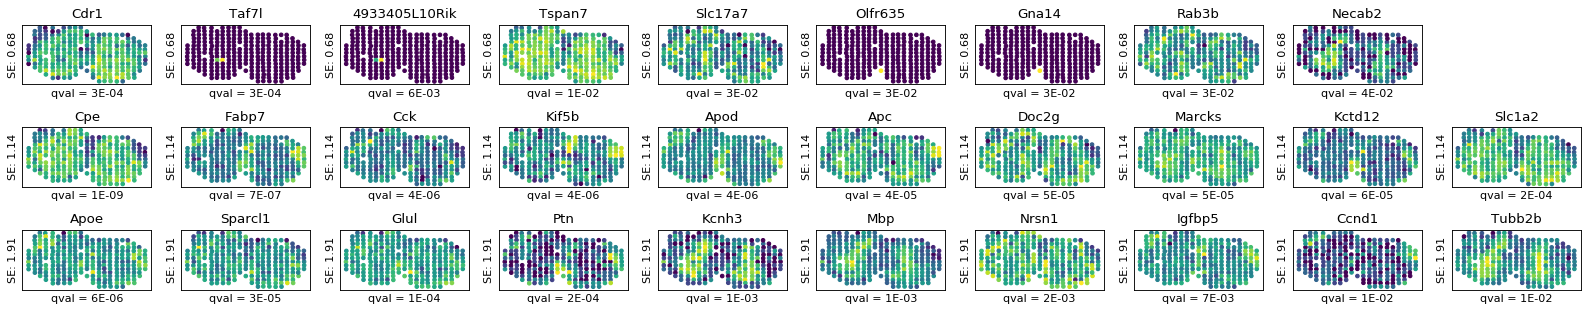

In [18]:
plt.figure(figsize=(20, 4), dpi=80)

N = 10
N_rows = top_per_ls['l'].unique().shape[0]
for j, T in enumerate(top_per_ls.groupby('l')):
    _, group = T
    for i, idx in enumerate(group.index):
        r = top_per_ls.loc[idx]
        plt.subplot(N_rows, N, j * N + i + 1)
        plt.scatter(sample_info.x, -sample_info.y, c=dfm[r['g']], s=10, rasterized=True);
        plt.title(r['g'])
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('qval = {:.0E}'.format(r['qval']))
        if True:
            plt.ylabel('{}: {:.2f}'.format(r['model'], r['l']))

plt.tight_layout()
plt.savefig('top_MOB_genes_per_ls.pdf')

In [19]:
from adjustText import adjust_text

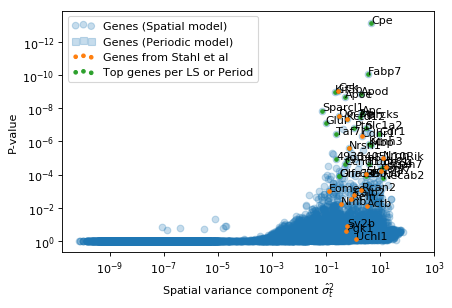

In [20]:
plt.figure(figsize=(6, 4), dpi=80)

plt.xscale('log')
plt.yscale('log')

tmp = results.query('model == "SE"')
plt.scatter(tmp['max_s2_t_hat'], tmp['pval'],
            alpha=0.25, rasterized=True, label='Genes (Spatial model)', marker='o', color='C0');

tmp = results.query('model == "PER"')
plt.scatter(tmp['max_s2_t_hat'], tmp['pval'],
            alpha=0.25, rasterized=True, label='Genes (Periodic model)', marker='s', color='C0');


plt.xlim(None, 1e3)

tmp = results.query('g in ["Penk", "Doc2g", "Kctd12",' \
                        '"Actb", "Pgk1",' \
                        '"Nrsn1", "Cck",' \
                        '"Pcp4", "Nrgn",' \
                        '"Eomes", "Calb2",' \
                        '"Doc2g", "Slc17a7", "Reln", "Cdhr1", "Sv2b", "Shisa3"' \
                        '"Plcxd2", "Nmb", "Uchl1", "Rcan2"]')


plt.scatter(tmp['max_s2_t_hat'], tmp['pval'], s=10, zorder=10, label='Genes from Stahl et al', c='C1');
texts = []
for i in tmp.index.union(top_per_ls.index):
    if results.loc[i, 'max_s2_t_hat'] == 0.:
        continue

    texts.append(plt.text(results.loc[i, 'max_s2_t_hat'], results.loc[i, 'pval'], results.loc[i, 'g']))
    
# print(adjust_text(texts, arrowprops=dict(arrowstyle='-'),
#                          force_points=0.1,
#                          force_text=0.1,
#                          force_objects=0.1,
#                          zorder=20,
# #                          x=results['max_s2_t_hat'],
# #                          y=results['pval'],
#      ))

plt.scatter(top_per_ls['max_s2_t_hat'], top_per_ls['pval'], s=10, label='Top genes per LS or Period', c='C2');
    
plt.xlabel('Spatial variance component $\hat{\sigma}^2_t$');
plt.ylabel('P-value');
plt.gca().invert_yaxis()

plt.legend(scatterpoints=3)
plt.savefig('sigma_pval_MOB.pdf', bbox_inches='tight');

In [21]:
results.sort_values('qval', ascending=True).query('qval < 0.05').head(30)

,g,max_delta,max_ll,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_null,LLR,pval,qval,total_variance
6353,Cpe,0.379205,-25.338919,-5.626476,4.628933,260,0.000515,1.135190,4,SE,72.920564,-81.214841,55.875922,7.716050e-14,1.146528e-09,6.384250
5314,Fabp7,0.687270,-154.769100,5.036316,3.603940,260,0.000516,1.135190,4,SE,331.780927,-196.735329,41.966229,9.286349e-11,6.899293e-07,6.080821
6136,Cck,0.612662,-190.163384,-0.673485,0.281531,260,0.000616,1.135190,4,SE,402.569494,-227.736968,37.573584,8.802861e-10,4.071584e-06,0.454015
5971,Kif5b,0.864467,-174.604394,0.639634,0.208328,260,0.000516,1.135190,4,SE,371.451514,-211.750420,37.146026,1.096059e-09,4.071584e-06,0.388420
5439,Apod,0.628597,-222.726757,3.532475,1.990274,260,0.000621,1.135190,4,SE,467.696240,-259.382165,36.655408,1.409674e-09,4.189268e-06,3.241354
11883,Apoe,1.340215,-52.802507,2.811749,0.497101,260,0.000523,1.907609,4,SE,127.847741,-88.500524,35.698017,2.303984e-09,5.705817e-06,1.163323
12042,Sparcl1,1.129545,-34.608077,-0.600227,0.071169,260,0.000549,1.907609,4,SE,91.458881,-66.785260,32.177183,1.407338e-08,2.987377e-05,0.151557
5046,Apc,0.873962,-146.945577,-3.922771,2.155212,260,0.000522,1.135190,4,SE,316.133880,-178.489169,31.543592,1.950129e-08,3.622121e-05,4.038785
6859,Doc2g,0.725074,-197.927518,-0.833564,0.301971,260,0.000519,1.135190,4,SE,418.097762,-228.569672,30.642154,3.102787e-08,5.122702e-05,0.520922
5621,Marcks,0.780965,-72.659535,-3.600306,1.811740,260,0.000516,1.135190,4,SE,167.561797,-103.069180,30.409645,3.497847e-08,5.197451e-05,3.226645


In [22]:
', '.join(results.query('qval < 0.05').g)

'Rab3b, Necab2, Tspan7, Cdr1, Slc17a7, 4933405L10Rik, Taf7l, Gna14, Olfr635, Pmepa1, Pcp4, Apc, Rbfox3, Penk, Frzb, Fabp7, Slc6a11, Apod, S100a5, Arhgap33, Cplx1, Trnp1, Marcks, Atp1b1, Vtn, Trak2, Igf1, Gabra1, Igfbp2, Lpar1, Omp, Kif5b, Sorbs1, Cck, Nr2f2, Scd1, Cpe, Aqp4, Doc2g, Slc1a2, Nrgn, Cdhr1, Mcf2l, Kctd12, Unc13c, Foxd3, Prokr2, Gng13, Kcnh3, Camk2b, Baiap2, Ccnd1, Gpsm1, Pbx1, Sepp1, Apoe, Tubb2b, Ncdn, Glul, Sash1, Ptgds, Sparcl1, Mbp, Nrsn1, Igfbp5, Ptn, Sfrp5'

In [23]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale

In [24]:
import NaiveDE

In [25]:
dfm = NaiveDE.stabilize(df.T).T
res = NaiveDE.regress_out(sample_info, dfm.T, 'np.log(total_counts)').T

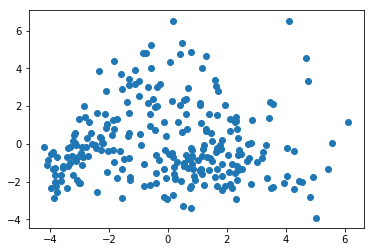

In [141]:
pca = PCA(2)
Y = pca.fit_transform(scale(res, 1))
plt.scatter(*Y.T);

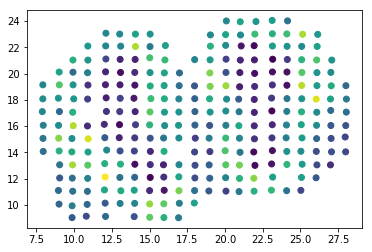

In [142]:
plt.scatter(sample_info.x, sample_info.y, c=Y[:,0])

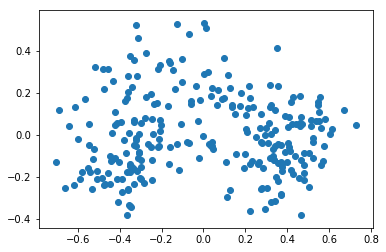

In [143]:
Y = pca.fit_transform(scale(res[results.query('qval < 0.05').g], 1))
plt.scatter(*Y.T);

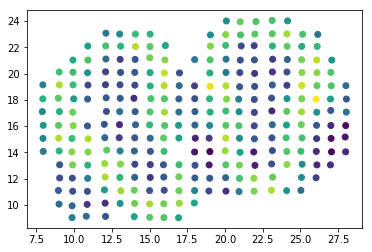

In [144]:
plt.scatter(sample_info.x, sample_info.y, c=Y[:,0])

In [406]:
from tsne import bh_sne

SystemError: Parent module 'bh_sne' not loaded, cannot perform relative import

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 260 / 260
[t-SNE] Mean sigma: 0.093007
[t-SNE] Iteration 25: error = 2.2313678, gradient norm = 0.0001046
[t-SNE] Iteration 25: gradient norm 0.000105. Finished.
[t-SNE] Iteration 50: error = 2.2244933, gradient norm = 0.0139329
[t-SNE] Iteration 75: error = 2.0100927, gradient norm = 0.0443039
[t-SNE] Iteration 100: error = 1.8638941, gradient norm = 0.0443090
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.863894
[t-SNE] Iteration 125: error = 1.1474110, gradient norm = 0.0223492
[t-SNE] Iteration 150: error = 1.0176075, gradient norm = 0.0188219
[t-SNE] Iteration 175: error = 0.9895629, gradient norm = 0.0178455
[t-SNE] Iteration 200: error = 0.9824353, gradient norm = 0.0175945
[t-SNE] Iteration 225: error = 0.9805011, gradient norm = 0.0175286
[t-SNE] Iteration 250: error = 0.9799737, gradient norm = 0.0175105
[t-SNE] Iterati

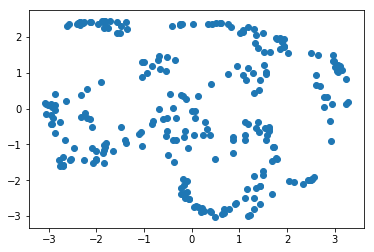

In [409]:
pca = PCA(2)
Y = pca.fit_transform(scale(res[results.query('qval < 0.05').g], 1))
tsne = TSNE(verbose=2, learning_rate=10., early_exaggeration=100, perplexity=25, angle=0)
YY = tsne.fit_transform(Y)
# YY = Y
plt.scatter(*YY.T);

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 260 / 260
[t-SNE] Mean sigma: 0.747957
[t-SNE] Iteration 25: error = 2.2255723, gradient norm = 0.0001371
[t-SNE] Iteration 25: gradient norm 0.000137. Finished.
[t-SNE] Iteration 50: error = 2.2146420, gradient norm = 0.0176359
[t-SNE] Iteration 75: error = 1.8906190, gradient norm = 0.0505405
[t-SNE] Iteration 100: error = 1.7155079, gradient norm = 0.0444031
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.715508
[t-SNE] Iteration 125: error = 1.0719818, gradient norm = 0.0195970
[t-SNE] Iteration 150: error = 0.9727644, gradient norm = 0.0162983
[t-SNE] Iteration 175: error = 0.9517681, gradient norm = 0.0156073
[t-SNE] Iteration 200: error = 0.9463105, gradient norm = 0.0154377
[t-SNE] Iteration 225: error = 0.9448270, gradient norm = 0.0153899
[t-SNE] Iteration 250: error = 0.9444197, gradient norm = 0.0153768
[t-SNE] Iterati

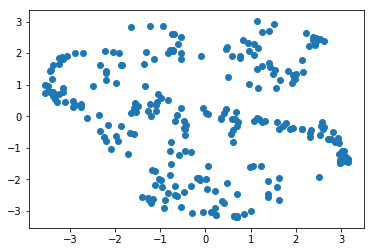

In [338]:
pca = PCA(2)
Y = pca.fit_transform(scale(res, 1))
tsne = TSNE(verbose=2, learning_rate=10., early_exaggeration=100, perplexity=25)
YY = tsne.fit_transform(Y)
# YY = Y
plt.scatter(*YY.T);

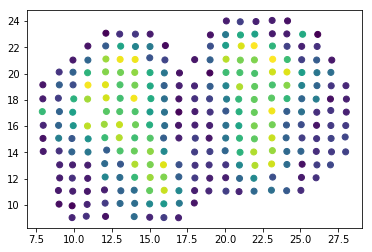

In [195]:
plt.scatter(sample_info.x, sample_info.y, c=YY[:,0])

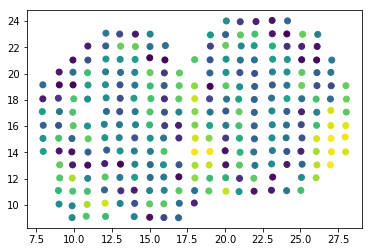

In [196]:
plt.scatter(sample_info.x, sample_info.y, c=YY[:,1])